In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Let's import our data and have a look at it.

In [2]:
data = pd.read_csv("data/diamonds_train.csv")
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
48935,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
48937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
48938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
data.shape

(48940, 10)

Let's add a volume column that is calculated as x*y*z, it may be useful to use it to do the analysis later on

In [4]:
data["volume"] = data["x"] * data["y"] * data["z"]

# Step 1: Univariate Analysis

In [5]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
volume     float64
dtype: object

In [6]:
data.describe()

,carat,depth,table,price,x,y,z,volume
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.798228,61.749144,57.458345,3936.532489,5.731582,5.735036,3.538968,129.903541
std,0.474353,1.434620,2.239743,3997.909823,1.123013,1.146151,0.707187,78.486015
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000,65.160371
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.811404
75%,1.040000,62.500000,59.000000,5330.000000,6.540000,6.540000,4.040000,170.848440
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,3840.598060


In [7]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
volume     0
dtype: int64

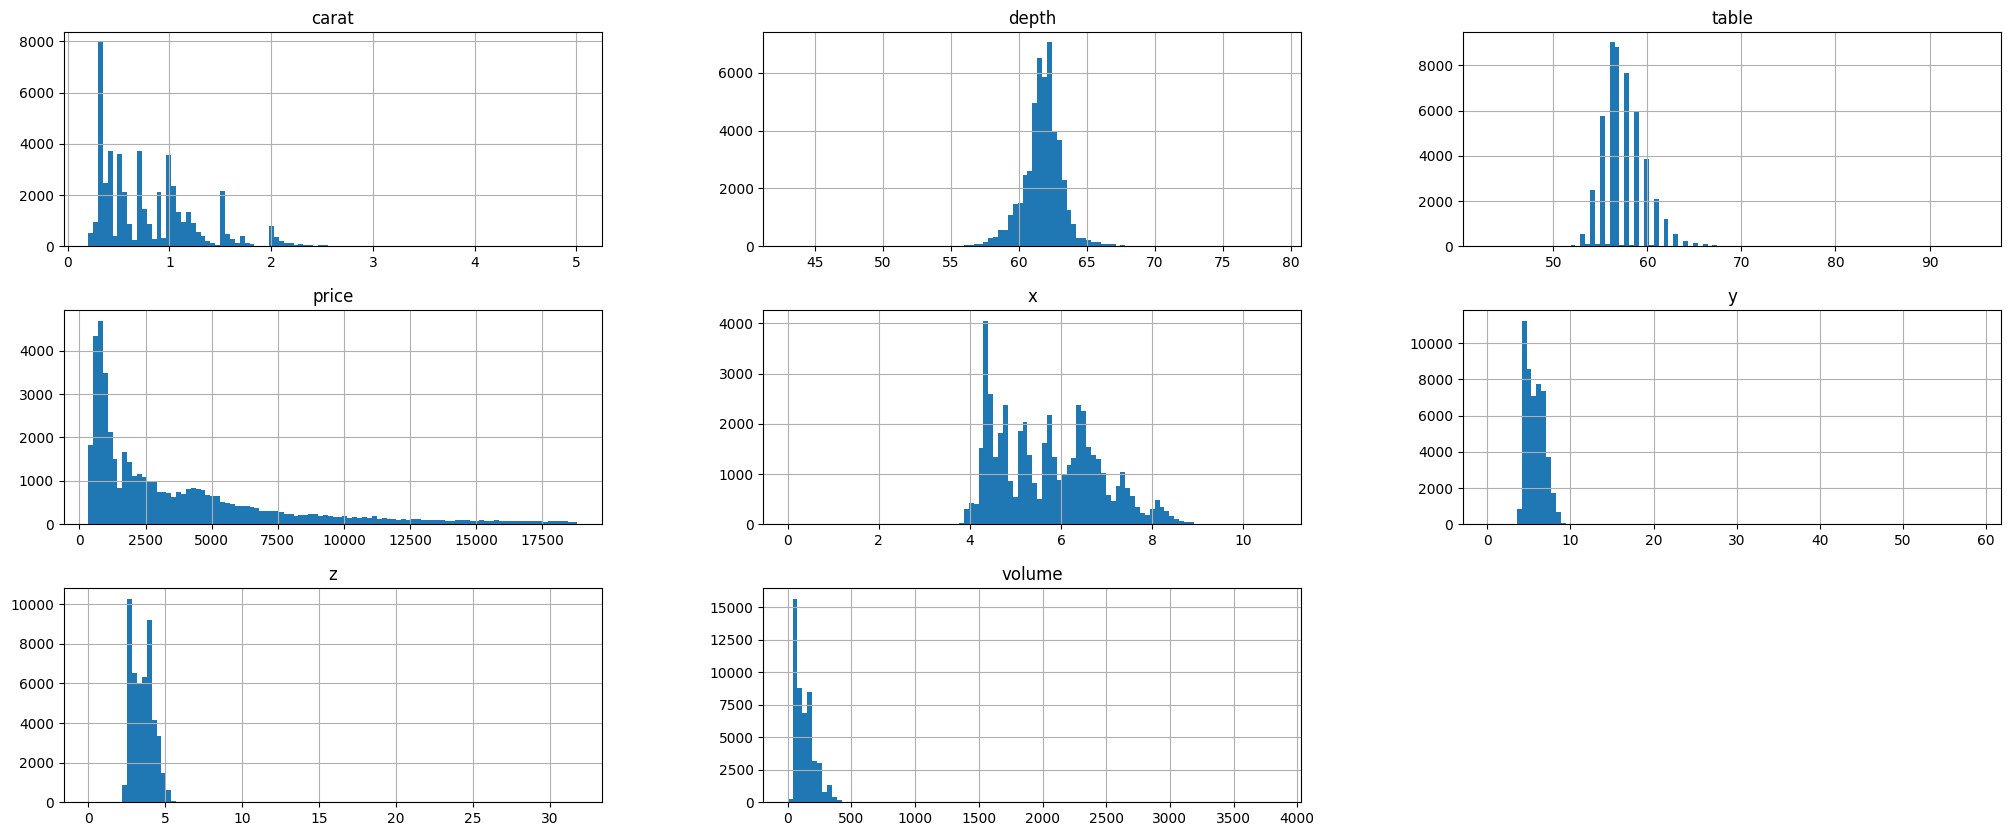

In [8]:
ax = data.hist(bins=100, figsize=(25, 10))

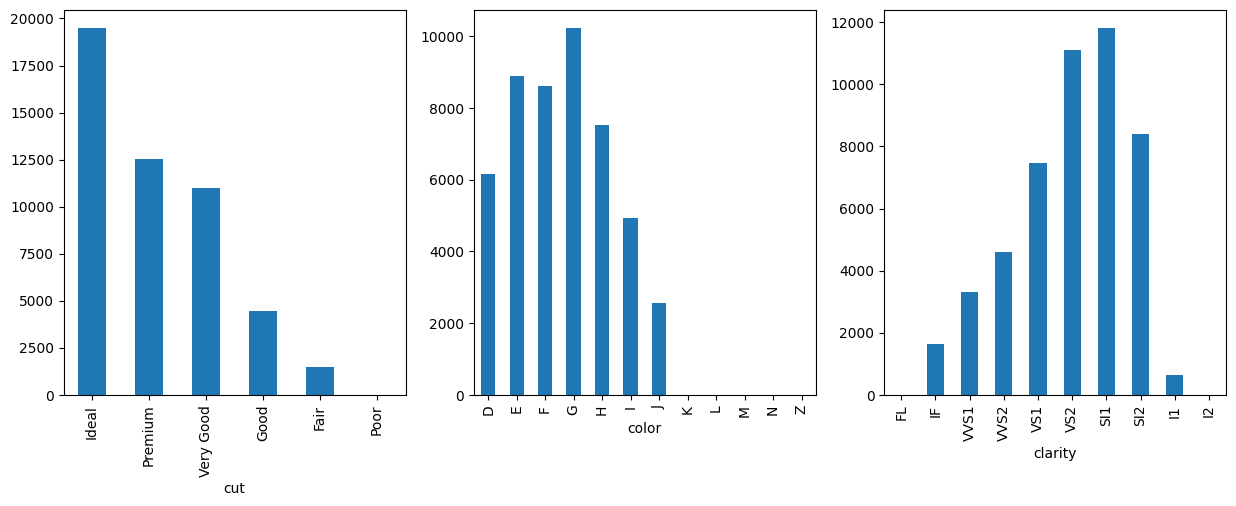

In [9]:
plt.subplot(131), data["cut"].value_counts().reindex(
    ["Ideal", "Premium", "Very Good", "Good", "Fair", "Poor"]
).plot(kind="bar", figsize=(15, 5))
plt.subplot(132), data["color"].value_counts().reindex(
    ["D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "Z"]
).plot(kind="bar", figsize=(15, 5))
plt.subplot(133), data["clarity"].value_counts().reindex(
    ["FL", "IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1", "I2"]
).plot(kind="bar", figsize=(15, 5))
plt.show()

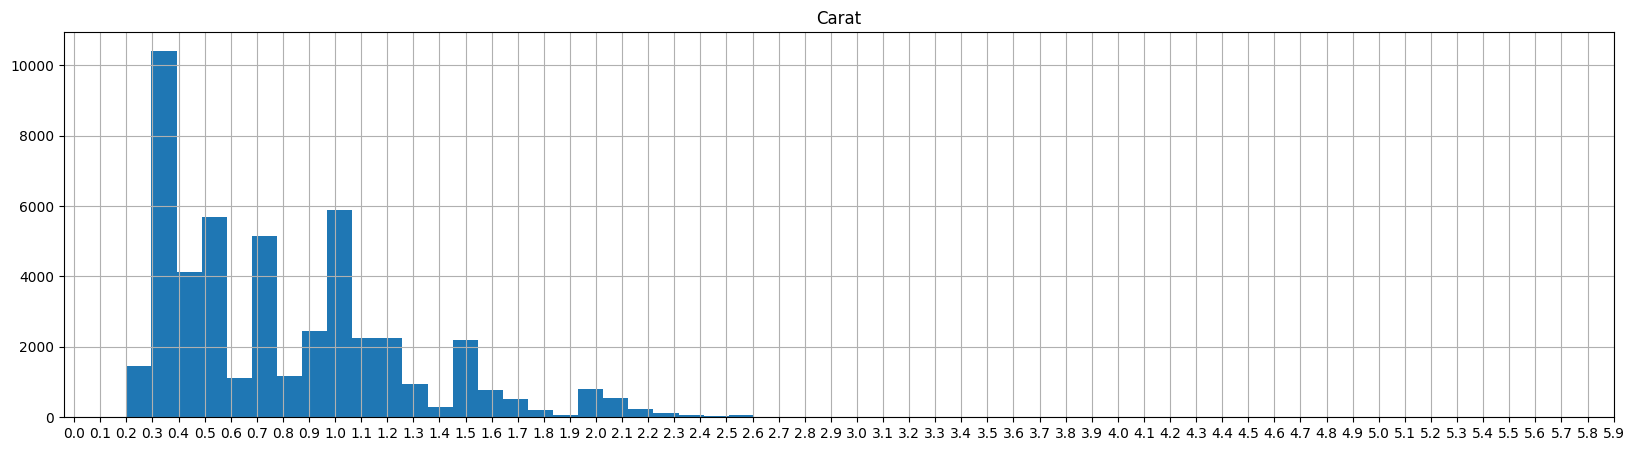

In [10]:
ax = data["carat"].hist(bins=50, figsize=(20, 5))
ax.set_xticks(np.arange(0.0, 6.0, 0.1))
ax.set_title("Carat")
plt.show()

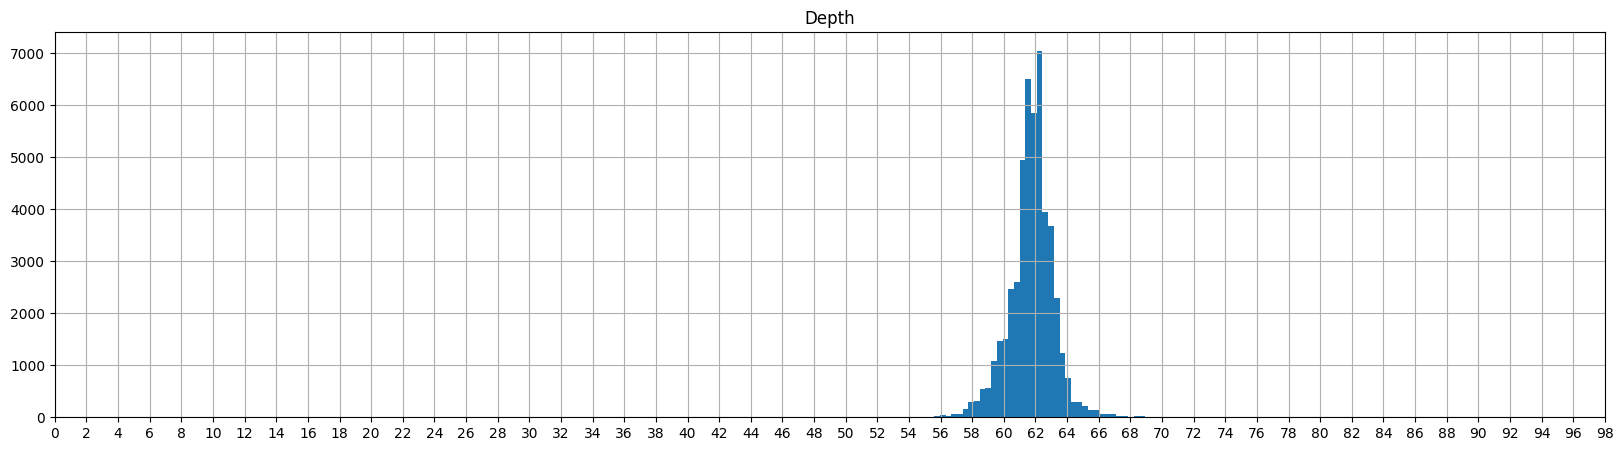

In [11]:
ax = data["depth"].hist(bins=100, figsize=(20, 5))
ax.set_xticks(np.arange(0, 100, 2))
ax.set_title("Depth")
plt.show()

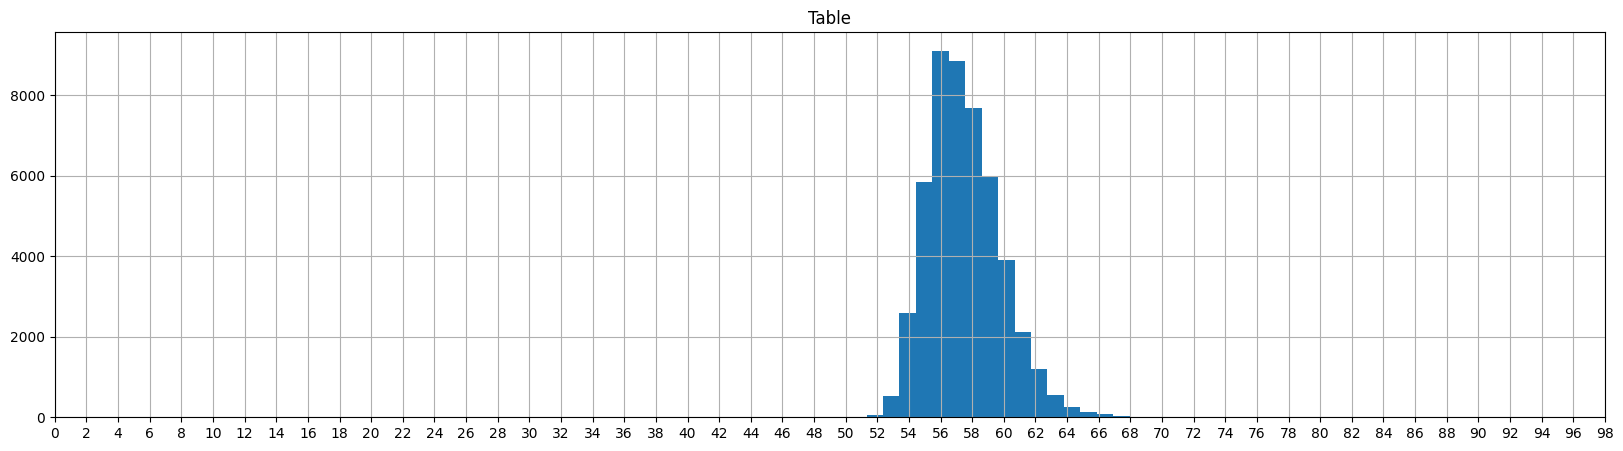

In [12]:
ax = data['table'].hist(bins=50, figsize=(20,5))
ax.set_xticks(np.arange(0, 100, 2))
ax.set_title('Table')
plt.show()

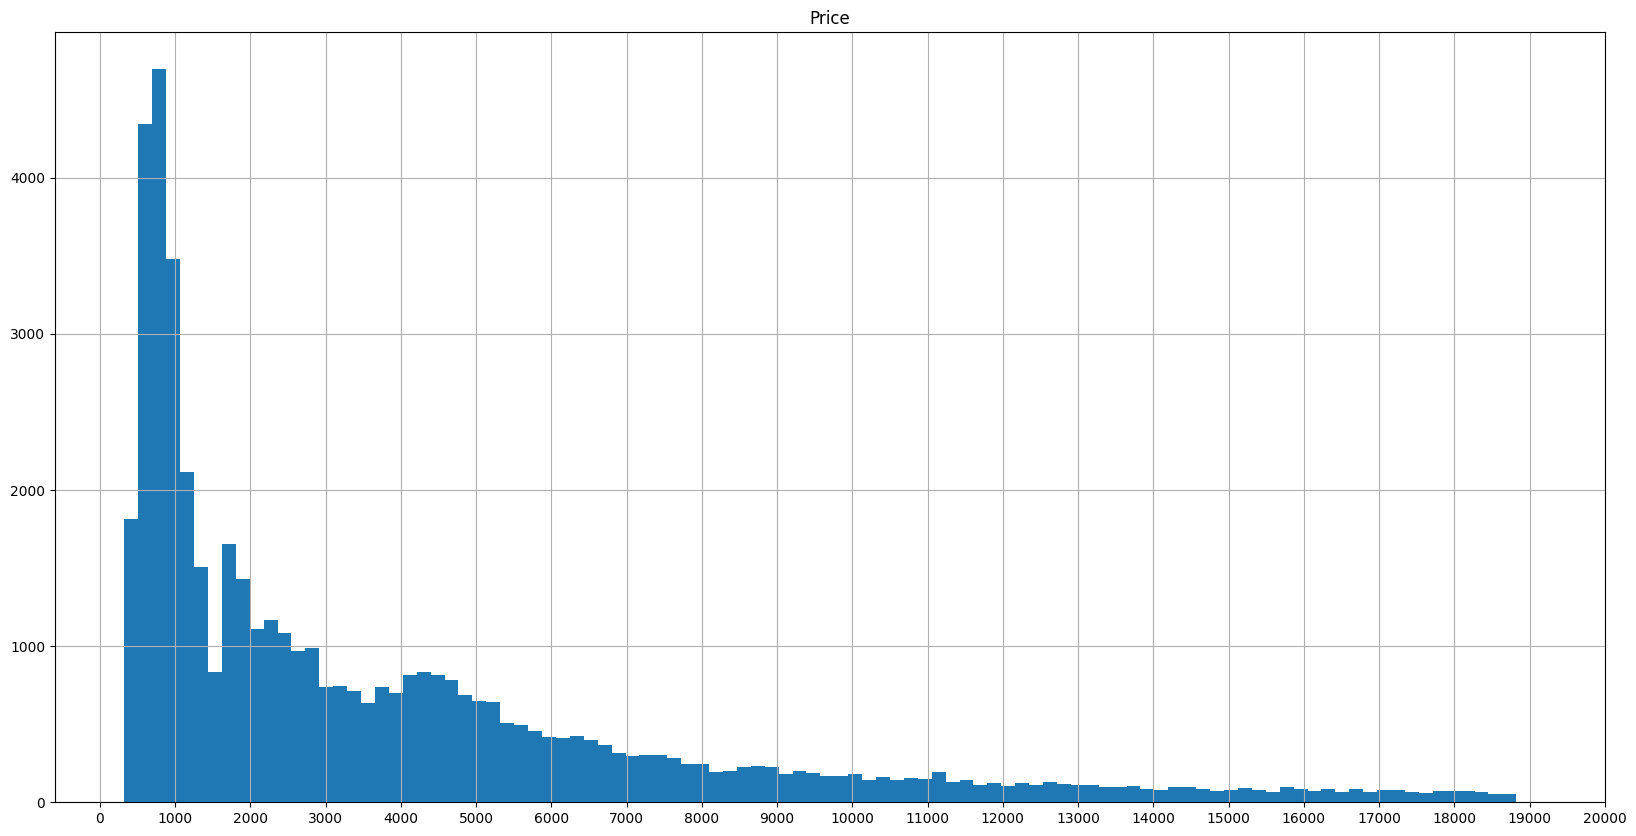

In [13]:
ax = data["price"].hist(bins=100, figsize=(20, 10))
ax.set_xticks(np.arange(0, 20001, 1000))
ax.set_title("Price")
plt.show()

Let's look at the outliers using boxplot

(<Axes: >, <Axes: >)

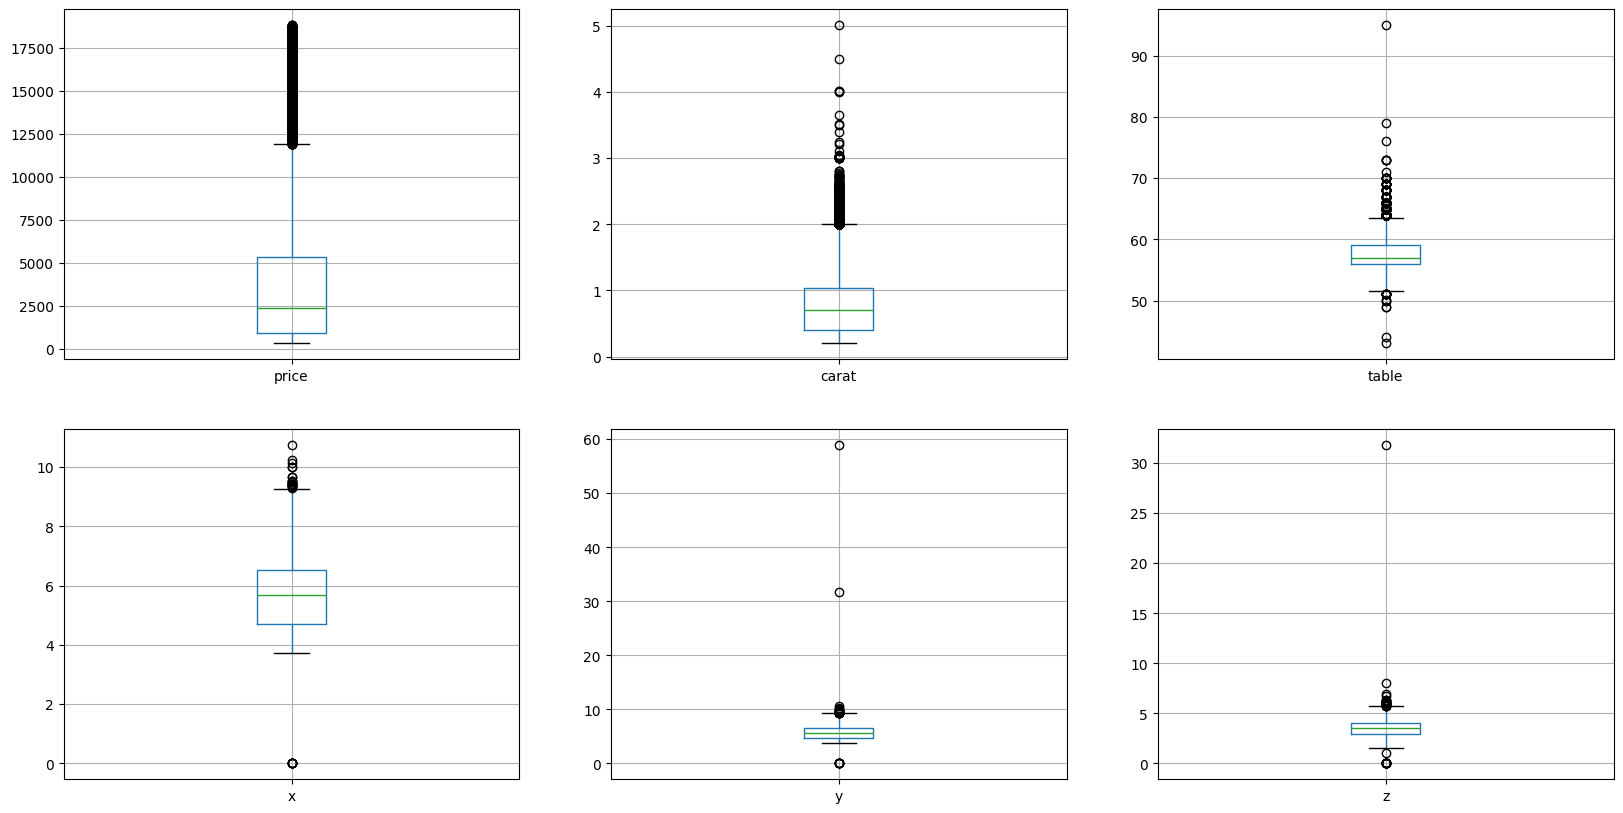

In [14]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.subplot(231), data.boxplot("price")
plt.subplot(232), data.boxplot("carat")
plt.subplot(233), data.boxplot("table")
plt.subplot(234), data.boxplot("x")
plt.subplot(235), data.boxplot("y")
plt.subplot(236), data.boxplot("z")

# Step 2: Bivariate Analysis

In [15]:
sns.pairplot(
    data,
    x_vars=["price", "carat", "depth", "table"],
    y_vars="price",
    hue="cut",
    height=5,
)
plt.show()

It seems worse cuts do not have normal depth and table values

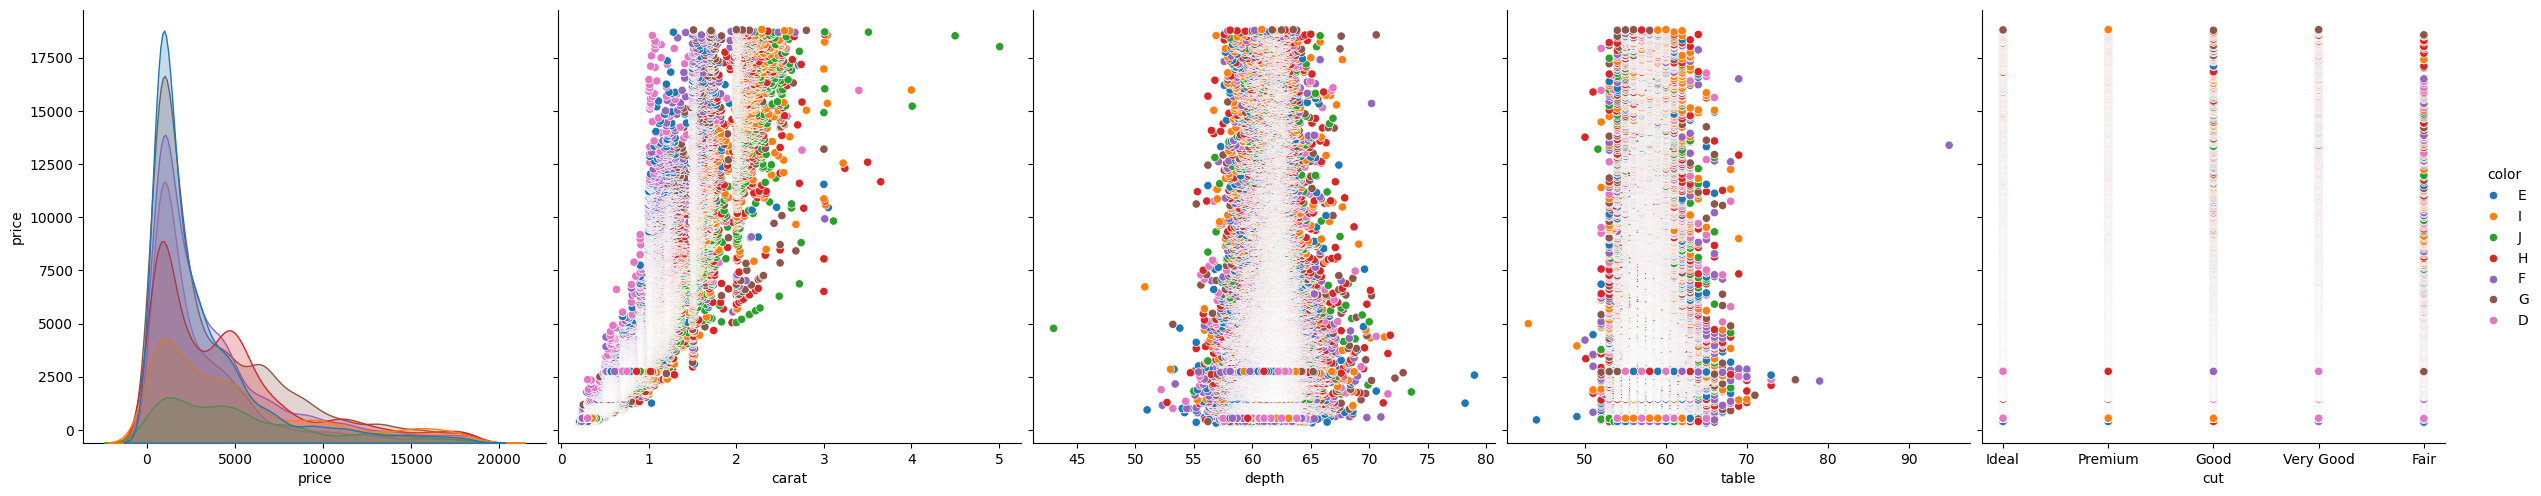

In [ ]:
sns.pairplot(
    data,
    x_vars=["price", "carat", "depth", "table"],
    y_vars="price",
    hue="color",
    height=5,
)
plt.show()

Color and carat are somewhat correlated

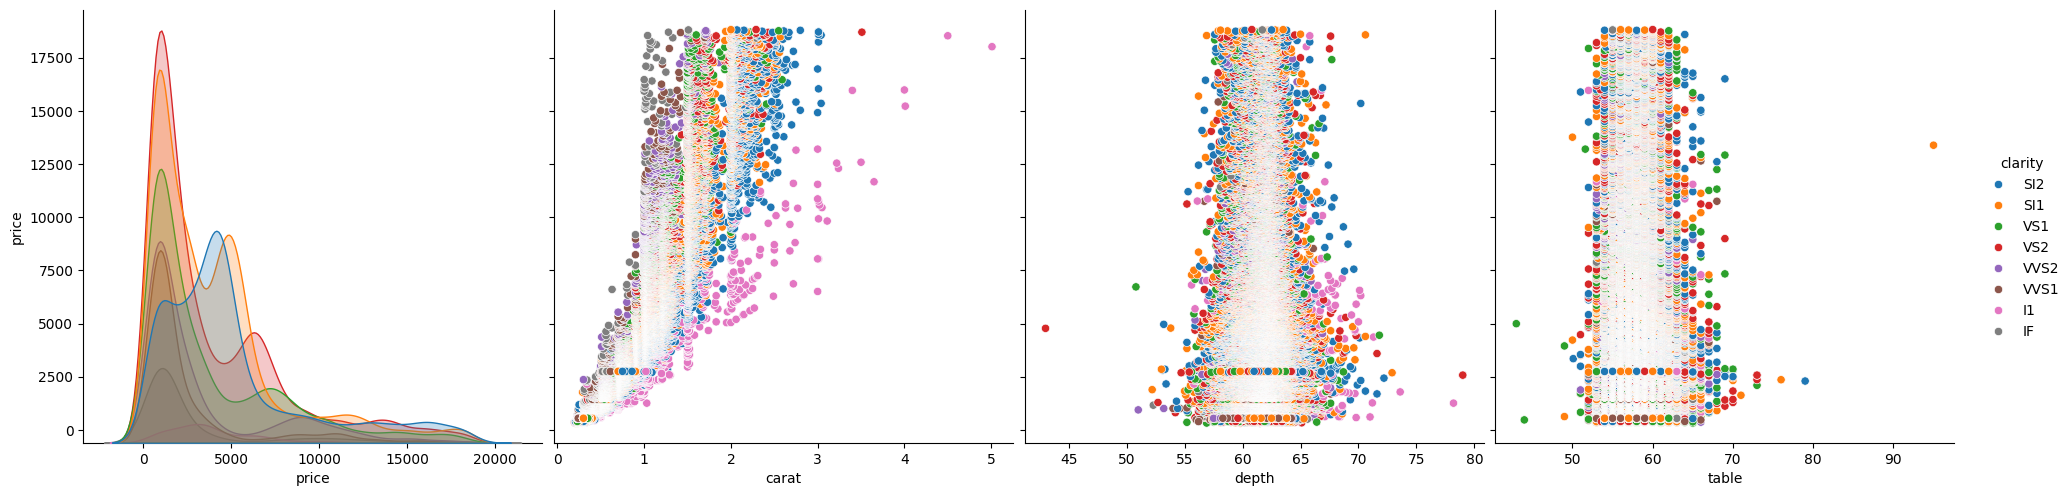

In [ ]:
sns.pairplot(
    data,
    x_vars=["price", "carat", "depth", "table"],
    y_vars="price",
    hue="clarity",
    height=5,
)
plt.show()

From the first plot above, there is some strange anomaly diomonds with SL2 clarity (Slightly Included 2 which is not really good) have prices higher than diomonds with good clarity.
Also clarity and carat are somewhat correlated

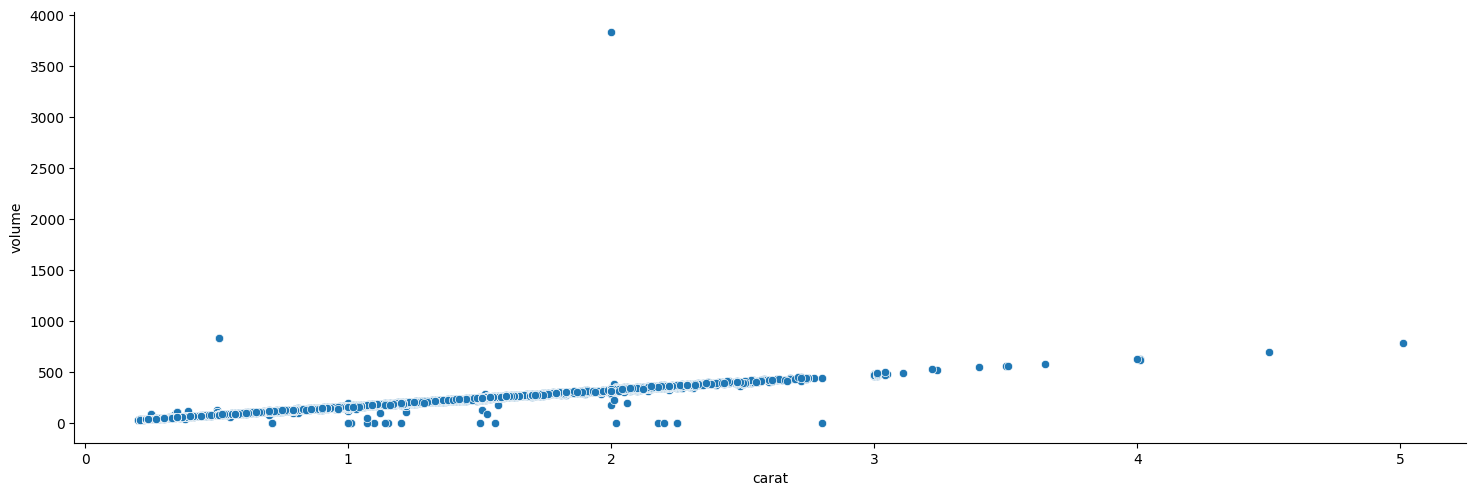

In [ ]:
sns.pairplot(data, x_vars="carat", y_vars="volume", height=5, aspect=3)
plt.show()

In [ ]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
volume     float64
dtype: object

<Axes: >

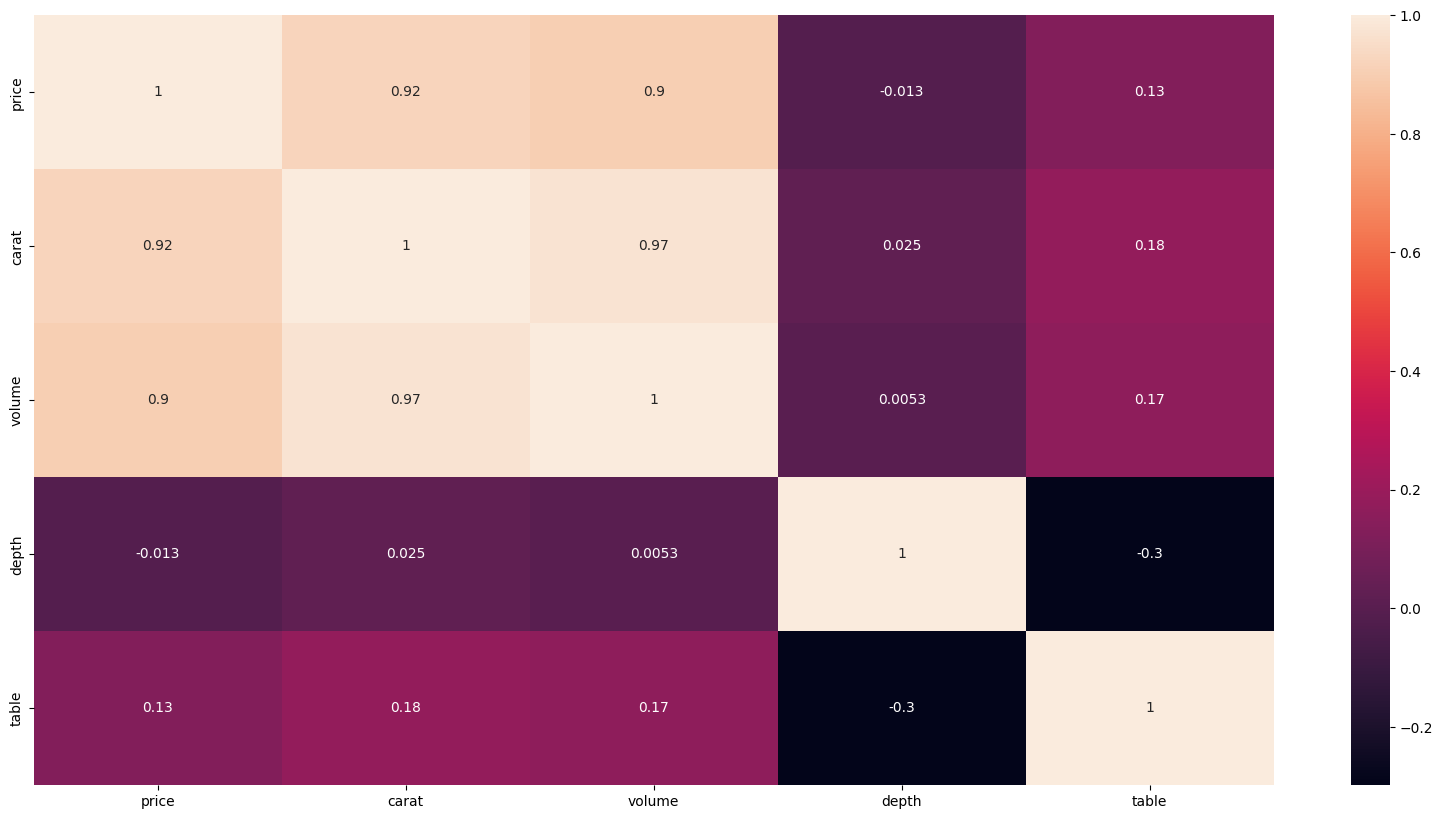

In [ ]:
corr = data[["price", "carat", "volume", "depth", "table"]].corr()
sns.heatmap(corr, annot=True)

# Conclusions
1. Depth and table values are normally distributed, most of depth values are roughly between (60%-64%), most of table values are roughly between (54%-62%)
2. Based on box plot, most of the diomonds available in the dataset are cheap up to 5000$, whereas the most expensive diomond is around 19000$
3. Based on pairplot, diomonds that are not cut well do not have normal depth and table sizes
4. Based on pairplot, there is some correlation between carat and price, it is most evident when carat is below 1.0
5. Based on pairplot, there is some correlation between carat and color, and between carat and clarity. More transparent and clear diomonds have lower caret values, while diomonds that have more color and have some inclusions have higher values of caret. I can assume there is correlation between color and clarity.
6. Based on pairplot, there is direct correlation between carat and volume. Correlation heatmap also testifies the correlation listed in point 4-6.
7. Based on pairplot, there is some strange anomaly - diomonds with SL2 clarity (Slightly Included 2 which is not really good) have prices higher than diomonds with good clarity